In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, func

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
Base = automap_base()

In [6]:
Base.prepare(engine, reflect=True)

In [7]:
Base.classes.keys()

['measurement', 'station']

In [8]:
Station = Base.classes.station

In [9]:
Measurement = Base.classes.measurement

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'],c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'],c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
session = Session(engine)

In [13]:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [14]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [15]:
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print( query_date)

2016-08-23


In [16]:
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).all()
results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [17]:
df = pd.DataFrame(results, columns=['date','prcp'])
df.set_index('date', inplace=True)
df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [18]:
sorted_df = df.sort_values("date")
sorted_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [19]:
sorted_df_0 = sorted_df.fillna(0)
sorted_df_0.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


<AxesSubplot:xlabel='date'>

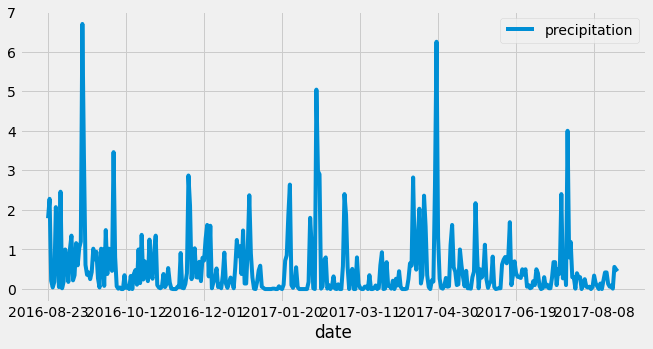

In [20]:
sorted_df_0.groupby(['date']).agg(precipitation=('prcp','max')).plot(figsize=(10, 5))

In [25]:
#Total number of stations in the dataset
session.query(Measurement).group_by(Measurement.station).count()

9

In [26]:
#Stations with the highest number of observations
session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.tobs).desc()).all()

[('USC00519397', 2724),
 ('USC00519523', 2669),
 ('USC00519281', 2772),
 ('USC00513117', 2709),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [40]:
temp = [Measurement.station, 
        func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs)]
session.query(*temp).\
    filter(Measurement.station == "USC00519397").\
    order_by(Measurement.tobs).all()

[('USC00519397', 56.0, 87.0, 74.55323054331865)]

In [41]:
tobs_results = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= query_date).\
    filter(Measurement.station == "USC00519397").\
    order_by(Measurement.tobs).all()
tobs_results

[('2017-01-08', 60.0),
 ('2017-02-02', 61.0),
 ('2017-02-09', 61.0),
 ('2016-12-16', 62.0),
 ('2017-01-01', 62.0),
 ('2017-01-04', 62.0),
 ('2017-02-08', 62.0),
 ('2017-01-03', 63.0),
 ('2017-01-05', 63.0),
 ('2017-01-10', 63.0),
 ('2017-04-30', 63.0),
 ('2017-01-06', 64.0),
 ('2017-01-09', 64.0),
 ('2017-01-28', 64.0),
 ('2017-02-07', 64.0),
 ('2017-02-25', 64.0),
 ('2017-01-14', 65.0),
 ('2017-01-27', 65.0),
 ('2017-02-03', 65.0),
 ('2017-02-26', 65.0),
 ('2016-12-12', 66.0),
 ('2016-12-15', 66.0),
 ('2016-12-31', 66.0),
 ('2017-01-02', 66.0),
 ('2017-01-07', 66.0),
 ('2017-01-15', 66.0),
 ('2017-01-17', 66.0),
 ('2017-03-01', 66.0),
 ('2016-12-06', 67.0),
 ('2016-12-13', 67.0),
 ('2017-01-12', 67.0),
 ('2017-01-13', 67.0),
 ('2017-01-16', 67.0),
 ('2017-01-29', 67.0),
 ('2017-01-30', 67.0),
 ('2016-11-29', 68.0),
 ('2016-12-05', 68.0),
 ('2017-01-31', 68.0),
 ('2017-02-12', 68.0),
 ('2017-02-18', 68.0),
 ('2017-03-07', 68.0),
 ('2017-03-10', 68.0),
 ('2016-12-03', 69.0),
 ('2016-12-

In [48]:
df = pd.DataFrame(tobs_results, columns=['date','tobs'])
df.set_index('date', inplace=True)
df.head()

,tobs
date,
2017-01-08,60.0
2017-02-02,61.0
2017-02-09,61.0
2016-12-16,62.0
2017-01-01,62.0


array([[<AxesSubplot:title={'center':'tobs'}>]], dtype=object)

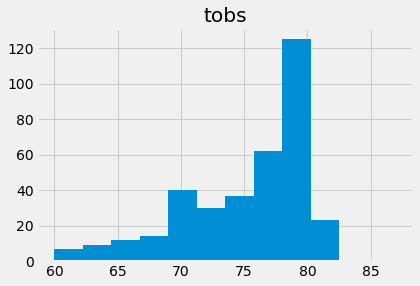

In [54]:
df.hist(bins=12)

In [55]:
session.close()